In [37]:
import wrds
db = wrds.Connection()

Enter your WRDS username [lhtee]:ltee11
Enter your password:········
WRDS recommends setting up a .pgpass file.
Create .pgpass file now [y/n]?: y
Created .pgpass file successfully.
Loading library list...
Done


In [162]:
#db.list_libraries()
#db.list_tables()
#db.describe_table()
#db.get_row_count()
#db.get_table()
#db.raw_sql()

In [189]:
help(db.list_libraries)
#help(db.list_tables)
#help(db.describe_table)
#help(db.get_row_count)
#help(db.get_table)
#help(db.raw_sql)

Help on method list_libraries in module wrds.sql:

list_libraries() method of wrds.sql.Connection instance
    Return all the libraries (schemas) the user can access.
    
    :rtype: list
    
    Usage::
    >>> db.list_libraries()
    ['aha', 'audit', 'block', 'boardex', ...]



In [331]:
help(db.describe_table)

Help on method describe_table in module wrds.sql:

describe_table(library, table) method of wrds.sql.Connection instance
    Takes the library and the table and describes all the columns
      in that table.
    Includes Column Name, Column Type, Nullable?, Comment
    
    :param library: Postgres schema name.
    :param table: Postgres table name.
    
    :rtype: pandas.DataFrame
    
    Usage::
    >>> db.describe_table('wrdssec_all', 'dforms')
                name nullable     type comment
          0      cik     True  VARCHAR
          1    fdate     True     DATE
          2  secdate     True     DATE
          3     form     True  VARCHAR
          4   coname     True  VARCHAR
          5    fname     True  VARCHAR



In [192]:
db.describe_table('ciq_common','wrds_isin')

Approximately 11053102 rows in ciq_common.wrds_isin.


,name,nullable,type,comment
0,companyid,True,DOUBLE_PRECISION,None
1,isin,True,VARCHAR(12),None
2,startdate,True,DATE,None
3,enddate,True,DATE,None
4,companyname,True,VARCHAR(400),None


In [228]:
db.describe_table('ciq_common','wrds_gvkey')

Approximately 125881 rows in ciq_common.wrds_gvkey.


,name,nullable,type,comment
0,companyid,True,DOUBLE_PRECISION,None
1,gvkey,True,VARCHAR(6),None
2,startdate,True,DATE,None
3,enddate,True,DATE,None
4,companyname,True,VARCHAR(400),None


In [ ]:
  ( 'US88579Y1010',
    'US0258161092',
    'US0311621009',
    'US0378331005',
    'US0970231058',
    'US1491231015',
    'US1667641005',
    'US17275R1023',
    'US1912161007',
    'US2605571031',
    'US38141G1040',
    'US4370761029',
    'US4385161066',
    'US4581401001',
    'US4592001014',
    'US46625H1005',
    'US4781601046',
    'US5801351017',
    'US58933Y1055',
    'US5949181045',
    'US6541061031',
    'US7427181091',
    'US79466L3024',
    'US89417E1091',
    'US91324P1021',
    'US92343V1044',
    'US92826C8394',
    'US9314271084',
    'US9311421039',
    'US2546871060'
  )

In [299]:
db.raw_sql("""
        select 
               a.companyid, 
               a.isin,
               b.gvkey,
               b.companyname
          from ciq_common.wrds_isin a, ciq_common.wrds_gvkey b
         where a.companyid = b.companyid 
           and a.isin in
               ('US88579Y1010',
                'US0258161092',
                'US0311621009',
                'US0378331005',
                'US0970231058',
                'US1491231015',
                'US1667641005',
                'US17275R1023',
                'US1912161007',
                'US2605571031',
                'US38141G1040',
                'US4370761029',
                'US4385161066',
                'US4581401001',
                'US4592001014',
                'US46625H1005',
                'US4781601046',
                'US5801351017',
                'US58933Y1055',
                'US5949181045',
                'US6541061031',
                'US7427181091',
                'US79466L3024',
                'US89417E1091',
                'US91324P1021',
                'US92343V1044',
                'US92826C8394',
                'US9314271084',
                'US9311421039',
                'US2546871060')
         --order by b.companyname
        order by b.gvkey
            """)

,companyid,isin,gvkey,companyname
0,1340740.0,US4385161066,001300,Honeywell International Inc.
1,92001.0,US0258161092,001447,American Express Company
2,24816.0,US0311621009,001602,Amgen Inc.
3,24937.0,US0378331005,001690,Apple Inc.
4,415798.0,US92343V1044,002136,Verizon Communications Inc.
5,370857.0,US0970231058,002285,The Boeing Company
6,259378.0,US1491231015,002817,Caterpillar Inc.
7,658776.0,US46625H1005,002968,JPMorgan Chase & Co.
8,98506.0,US1667641005,002991,Chevron Corporation
9,26642.0,US1912161007,003144,The Coca-Cola Company


In [239]:
db.raw_sql( """
                select a.gvkey, count(b.isin) 
                  from ciq_common.wrds_gvkey a, ciq_common.wrds_isin b
                 where a.companyid = b.companyid
                   and a.gvkey in 
                       (              
                       '001690'
                        )
                group by a.gvkey
             """)

,gvkey,count
0,001690,129


In [235]:
db.raw_sql( """
                select a.gvkey, count(b.isin) 
                  from ciq_common.wrds_gvkey a, ciq_common.wrds_isin b
                 where a.companyid = b.companyid
                   and a.gvkey in 
                       (
                        /*
                        '001300',
                        '001447',
                        '001602',
                        */                 
                        '001690'--,
                        /*
                        '002136',
                        '002285',
                        '002817',
                        '002968',
                        '002991',
                        '003144',
                        '003980',
                        '005680',
                        '006008',
                        '006066',
                        '006266',
                        '007154',
                        '007257',
                        '007435',
                        '007906',
                        '008762',
                        '010903',
                        '011259',
                        '011264',
                        '012141',
                        '020779',
                        '034443',
                        '062689',
                        '114628',
                        '157855',
                        '179534'
                        */
                        )
                group by a.gvkey
                 
            """)

,gvkey,count
0,001690,129


In [245]:
db.raw_sql("""select count(*) from ciq_common.wrds_gvkey""")

,count
0,125881


In [249]:
db.describe_table('comp_na_daily_all', 'funda')

Approximately 875817 rows in comp_na_daily_all.funda.


,name,nullable,type,comment
0,gvkey,True,VARCHAR(6),None
1,datadate,True,DATE,None
2,fyear,True,DOUBLE_PRECISION,None
3,indfmt,True,VARCHAR(12),None
4,consol,True,VARCHAR(2),None
5,popsrc,True,VARCHAR(1),None
6,datafmt,True,VARCHAR(12),None
7,tic,True,VARCHAR(8),None
8,cusip,True,VARCHAR(9),None
9,conm,True,VARCHAR(70),None


In [301]:
db.raw_sql("""
           select gvkey, datadate, naicsh, mkvalt from comp_na_daily_all.funda
            where gvkey in 
                        (
                        '001300',
                        '001447',
                        '001602',                 
                        '001690',
                        '002136',
                        '002285',
                        '002817',
                        '002968',
                        '002991',
                        '003144',
                        '003980',
                        '005680',
                        '006008',
                        '006066',
                        '006266',
                        '007154',
                        '007257',
                        '007435',
                        '007906',
                        '008762',
                        '010903',
                        '011259',
                        '011264',
                        '012141',
                        '020779',
                        '034443',
                        '062689',
                        '114628',
                        '157855',
                        '179534'
                        )
             order by gvkey, datadate desc
            """)

,gvkey,datadate,naicsh,mkvalt
0,001300,2022-12-31,336413.0,1.430667e+05
1,001300,2022-12-31,336413.0,1.430667e+05
2,001300,2021-12-31,336413.0,1.427876e+05
3,001300,2021-12-31,336413.0,1.427876e+05
4,001300,2020-12-31,336413.0,1.482094e+05
5,001300,2020-12-31,336413.0,1.482094e+05
6,001300,2019-12-31,336413.0,1.258647e+05
7,001300,2019-12-31,336413.0,1.258647e+05
8,001300,2018-12-31,336413.0,9.639475e+04
9,001300,2018-12-31,336413.0,9.639475e+04


In [319]:
db.raw_sql("""
           select gvkey, naicsh from comp_na_daily_all.funda
            where gvkey in 
                        (
                        '001300',
                        '001447',
                        '001602',                 
                        '001690',
                        '002136',
                        '002285',
                        '002817',
                        '002968',
                        '002991',
                        '003144',
                        '003980',
                        '005680',
                        '006008',
                        '006066',
                        '006266',
                        '007154',
                        '007257',
                        '007435',
                        '007906',
                        '008762',
                        '010903',
                        '011259',
                        '011264',
                        '012141',
                        '020779',
                        '034443',
                        '062689',
                        '114628',
                        '157855',
                        '179534'
                        )
        and naicsh is not null
        group by gvkey, naicsh
        order by gvkey
            """)

,gvkey,naicsh
0,001300,334512.0
1,001300,336399.0
2,001300,336412.0
3,001300,336413.0
4,001447,523.0
5,001447,522210.0
6,001447,522320.0
7,001602,325414.0
8,001690,334111.0
9,001690,334220.0


In [294]:
help(db.raw_sql)

Help on method raw_sql in module wrds.sql:

raw_sql(sql, coerce_float=True, date_cols=None, index_col=None, params=None, chunksize=500000, return_iter=False) method of wrds.sql.Connection instance
    Queries the database using a raw SQL string.
    
    :param sql: SQL code in string object.
    :param coerce_float: (optional) boolean, default: True
        Attempt to convert values to non-string, non-numeric objects
        to floating point. Can result in loss of precision.
    :param date_cols: (optional) list or dict, default: None
        - List of column names to parse as date
        - Dict of ``{column_name: format string}`` where
            format string is:
              strftime compatible in case of parsing string times or
              is one of (D, s, ns, ms, us) in case of parsing
                integer timestamps
        - Dict of ``{column_name: arg dict}``,
            where the arg dict corresponds to the keyword arguments of
              :func:`pandas.to_datetim

In [330]:
parm = {'id_gvkey':  (
                        '001300',
                        '001447',
                        '001602',                 
                        '001690',
                        '002136',
                        '002285',
                        '002817',
                        '002968',
                        '002991',
                        '003144',
                        '003980',
                        '005680',
                        '006008',
                        '006066',
                        '006266',
                        '007154',
                        '007257',
                        '007435',
                        '007906',
                        '008762',
                        '010903',
                        '011259',
                        '011264',
                        '012141',
                        '020779',
                        '034443',
                        '062689',
                        '114628',
                        '157855',
                        '179534'
                        )
       }
db.raw_sql("""
           select distinct gvkey, datadate, 
                  naicsh, to_char(naicsh,'9999999999999'), cast(naicsh as VARCHAR(6)), substr(cast(naicsh as VARCHAR(6)),1,2)  
             from comp_na_daily_all.funda
            where gvkey in %(id_gvkey)s
              and naicsh is not null           
         order by gvkey, datadate desc
            """, params=parm)


,gvkey,datadate,naicsh,to_char,naicsh,substr
0,001300,2022-12-31,336413.0,336413,336413,33
1,001300,2021-12-31,336413.0,336413,336413,33
2,001300,2020-12-31,336413.0,336413,336413,33
3,001300,2019-12-31,336413.0,336413,336413,33
4,001300,2018-12-31,336413.0,336413,336413,33
5,001300,2017-12-31,336413.0,336413,336413,33
6,001300,2016-12-31,336413.0,336413,336413,33
7,001300,2015-12-31,334512.0,334512,334512,33
8,001300,2014-12-31,334512.0,334512,334512,33
9,001300,2013-12-31,334512.0,334512,334512,33


In [30]:
db.describe_table('crsp_a_stock','dsedelist')

Approximately 36984 rows in crsp_a_stock.dsedelist.


,name,nullable,type,comment
0,permno,True,DOUBLE_PRECISION,PERMNO
1,dlstdt,True,DATE,Delisting Date
2,dlstcd,True,DOUBLE_PRECISION,Delisting Code
3,nwperm,True,DOUBLE_PRECISION,New PERMNO
4,nwcomp,True,DOUBLE_PRECISION,New PERMCO
5,nextdt,True,DATE,Delisting Next Price Date
6,dlamt,True,DOUBLE_PRECISION,Delisting Amount
7,dlretx,True,DOUBLE_PRECISION,Delisting Return Without Dividends
8,dlprc,True,DOUBLE_PRECISION,Delisting Price
9,dlpdt,True,DATE,Delisting Amount Date


In [333]:
db.describe_table('crsp_a_stock','dsedelist').to_csv('CRSP_A_STOCK_dsedelist.csv')

Approximately 36984 rows in crsp_a_stock.dsedelist.


In [107]:
crsp_dsedelist = db.raw_sql("""
                       select *
                         from crsp_a_stock.dsedelist
                        where permno in 
                              (
                              '11081',
                              '13430',
                              '14295',
                              '91212'
                               )
                            """)
crsp_dsedelist

,permno,dlstdt,dlstcd,nwperm,nwcomp,nextdt,dlamt,dlretx,dlprc,dlpdt,dlret,permco,compno,issuno,hexcd,hsiccd,cusip,acperm,accomp
0,11081.0,2013-10-29,233.0,0.0,0.0,None,13.880000,0.001443,0.0,2013-10-30,0.001443,9833.0,70015042.0,13114.0,3.0,3570.0,24702R10,None,None
1,13430.0,2014-12-12,242.0,15113.0,55137.0,None,35.309940,-0.005354,0.0,2014-12-15,-0.005354,54100.0,0.0,0.0,1.0,5812.0,12122010,None,None
2,14295.0,2022-10-27,233.0,0.0,0.0,None,54.200001,0.009311,0.0,2022-10-28,0.009311,54638.0,0.0,0.0,1.0,7375.0,90184L10,None,None
3,91212.0,2010-10-19,233.0,0.0,0.0,None,24.000000,0.000417,0.0,2010-10-20,0.000417,50692.0,0.0,0.0,1.0,5812.0,12120820,None,None


In [59]:
crsp_dsedelist[['permco','permno']].astype(int)
crsp_dsedelist

,permno,dlstdt,dlstcd,nwperm,nwcomp,nextdt,dlamt,dlretx,dlprc,dlpdt,dlret,permco,compno,issuno,hexcd,hsiccd,cusip,acperm,accomp
0,11081,2013-10-29,233.0,0.0,0.0,None,13.880000,0.001443,0.0,2013-10-30,0.001443,9833,70015042.0,13114.0,3.0,3570.0,24702R10,None,None
1,13430,2014-12-12,242.0,15113.0,55137.0,None,35.309940,-0.005354,0.0,2014-12-15,-0.005354,54100,0.0,0.0,1.0,5812.0,12122010,None,None
2,14295,2022-10-27,233.0,0.0,0.0,None,54.200001,0.009311,0.0,2022-10-28,0.009311,54638,0.0,0.0,1.0,7375.0,90184L10,None,None
3,91212,2010-10-19,233.0,0.0,0.0,None,24.000000,0.000417,0.0,2010-10-20,0.000417,50692,0.0,0.0,1.0,5812.0,12120820,None,None


In [60]:
import pandas as pd
pd.options.display.max_columns = None
pd.options.display.max_rows = None
display(crsp_dsedelist)

,permno,dlstdt,dlstcd,nwperm,nwcomp,nextdt,dlamt,dlretx,dlprc,dlpdt,dlret,permco,compno,issuno,hexcd,hsiccd,cusip,acperm,accomp
0,11081,2013-10-29,233.0,0.0,0.0,None,13.880000,0.001443,0.0,2013-10-30,0.001443,9833,70015042.0,13114.0,3.0,3570.0,24702R10,None,None
1,13430,2014-12-12,242.0,15113.0,55137.0,None,35.309940,-0.005354,0.0,2014-12-15,-0.005354,54100,0.0,0.0,1.0,5812.0,12122010,None,None
2,14295,2022-10-27,233.0,0.0,0.0,None,54.200001,0.009311,0.0,2022-10-28,0.009311,54638,0.0,0.0,1.0,7375.0,90184L10,None,None
3,91212,2010-10-19,233.0,0.0,0.0,None,24.000000,0.000417,0.0,2010-10-20,0.000417,50692,0.0,0.0,1.0,5812.0,12120820,None,None


In [116]:
apple = db.raw_sql("""select 
                              permno, 
                              date, 
                              prc, 
                              ret, 
                              shrout 
                        from crsp_a_stock.msf 
                       where permno = 14593
                         and date>='01/01/1980'
                         and date<='12/31/2022'
                    order by date""", 
                         date_cols=['date'], index_col=['date'])
apple

,permno,prc,ret,shrout
date,,,,
1980-11-28,14593.0,NaN,NaN,NaN
1980-12-31,14593.0,-34.187500,NaN,55136.0
1981-01-30,14593.0,-28.375000,-0.170018,55136.0
1981-02-27,14593.0,-26.625000,-0.061674,55136.0
1981-03-31,14593.0,-24.625000,-0.075117,55136.0
1981-04-30,14593.0,-28.500000,0.157360,55136.0
1981-05-29,14593.0,-33.187500,0.164474,55136.0
1981-06-30,14593.0,-26.062500,-0.214689,55136.0
1981-07-31,14593.0,-25.062500,-0.038369,55136.0


In [117]:
apple.shape

(506, 4)

In [121]:
apple2 = db.raw_sql("""select 
                              --permno, 
                              date, 
                              --prc, 
                              ret--, 
                              --shrout 
                        from crsp_a_stock.msf 
                       where permno = 14593
                         and date>='01/01/1980'
                         and date<='12/31/2022'
                    order by date""", 
                         date_cols=['date'], index_col=['date'])
apple2

,ret
date,
1980-11-28,NaN
1980-12-31,NaN
1981-01-30,-0.170018
1981-02-27,-0.061674
1981-03-31,-0.075117
1981-04-30,0.157360
1981-05-29,0.164474
1981-06-30,-0.214689
1981-07-31,-0.038369


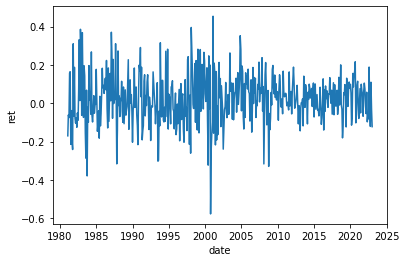

In [122]:
import matplotlib.pyplot as plt
plt.plot(apple2)
plt.xlabel('date')
plt.ylabel('ret')
plt.show()

In [88]:
spx_dvd = db.raw_sql("""
                                select  
                                        date, 
                                        rate  
                                from optionm_all.idxdvd 
                                where secid = '108105'
                                and date >= '01/01/1996'
                                and date <= '12/31/2022'
                                order by date
                             """, 
                             date_cols=['date'], index_col=['date'])
spx_dvd

,rate
date,
1996-01-04,2.460492
1996-01-05,2.492410
1996-01-08,2.612404
1996-01-09,2.454958
1996-01-10,2.510953
1996-01-11,2.551969
1996-01-12,2.623024
1996-01-15,2.686903
1996-01-16,2.705258


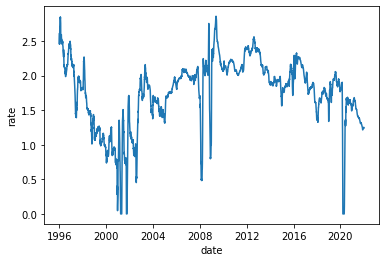

In [91]:
plt.plot(spx_dvd)
plt.xlabel('date')
plt.ylabel('rate')
plt.show()

In [4]:
db.describe_table('crsp_a_stock','dse')

Approximately 12353111 rows in crsp_a_stock.dse.


,name,nullable,type,comment
0,event,True,VARCHAR(8),Event Name
1,date,True,DATE,Date of Observation. NAMEDT of NAMES events; e...
2,hsicmg,True,DOUBLE_PRECISION,Header SIC Major Gorup
3,hsicig,True,DOUBLE_PRECISION,Header SIC Industry Group
4,comnam,True,VARCHAR(32),Company Name
5,cusip,True,VARCHAR(8),CUSIP Identifier
6,dclrdt,True,DATE,Declaration Date
7,dlamt,True,DOUBLE_PRECISION,Amount After Delisting
8,dlpdt,True,DATE,Date of Delisting Payment
9,dlstcd,True,DOUBLE_PRECISION,Delisting Code


In [61]:
crsp_dse = db.raw_sql("""
                       select * from crsp_a_stock.dse
                        where permno in 
                                (
                                '11081',
                                '13430',
                                '14295',
                                '91212'
                                )
                          and event = 'DELIST'
                      """)
crsp_dse

,event,date,hsicmg,hsicig,comnam,cusip,dclrdt,dlamt,dlpdt,dlstcd,hsiccd,issuno,ncusip,nextdt,paydt,rcrddt,shrcls,shrflg,ticker,permno,nameendt,shrcd,exchcd,siccd,tsymbol,naics,primexch,trdstat,secstat,permco,compno,hexcd,distcd,divamt,facpr,facshr,acperm,accomp,nwperm,nwcomp,dlretx,dlprc,dlret,shrout,shrenddt,trtscd,trtsendt,nmsind,mmcnt,nsdinx
0,DELIST,2013-10-29,35.0,357.0,None,24702R10,None,13.880000,2013-10-30,233.0,3570.0,13114.0,None,None,None,None,None,None,None,11081.0,None,None,None,None,None,None,None,None,None,9833.0,70015042.0,3.0,None,None,None,None,None,None,0.0,0.0,0.001443,0.0,0.001443,None,None,None,None,None,None,None
1,DELIST,2014-12-12,58.0,581.0,None,12122010,None,35.309940,2014-12-15,242.0,5812.0,0.0,None,None,None,None,None,None,None,13430.0,None,None,None,None,None,None,None,None,None,54100.0,0.0,1.0,None,None,None,None,None,None,15113.0,55137.0,-0.005354,0.0,-0.005354,None,None,None,None,None,None,None
2,DELIST,2022-10-27,73.0,737.0,None,90184L10,None,54.200001,2022-10-28,233.0,7375.0,0.0,None,None,None,None,None,None,None,14295.0,None,None,None,None,None,None,None,None,None,54638.0,0.0,1.0,None,None,None,None,None,None,0.0,0.0,0.009311,0.0,0.009311,None,None,None,None,None,None,None
3,DELIST,2010-10-19,58.0,581.0,None,12120820,None,24.000000,2010-10-20,233.0,5812.0,0.0,None,None,None,None,None,None,None,91212.0,None,None,None,None,None,None,None,None,None,50692.0,0.0,1.0,None,None,None,None,None,None,0.0,0.0,0.000417,0.0,0.000417,None,None,None,None,None,None,None


In [63]:
crsp_dse[['permco','permno']].astype(int)
crsp_dse

,event,date,hsicmg,hsicig,comnam,cusip,dclrdt,dlamt,dlpdt,dlstcd,hsiccd,issuno,ncusip,nextdt,paydt,rcrddt,shrcls,shrflg,ticker,permno,nameendt,shrcd,exchcd,siccd,tsymbol,naics,primexch,trdstat,secstat,permco,compno,hexcd,distcd,divamt,facpr,facshr,acperm,accomp,nwperm,nwcomp,dlretx,dlprc,dlret,shrout,shrenddt,trtscd,trtsendt,nmsind,mmcnt,nsdinx
0,DELIST,2013-10-29,35.0,357.0,None,24702R10,None,13.880000,2013-10-30,233.0,3570.0,13114.0,None,None,None,None,None,None,None,11081,None,None,None,None,None,None,None,None,None,9833,70015042.0,3.0,None,None,None,None,None,None,0.0,0.0,0.001443,0.0,0.001443,None,None,None,None,None,None,None
1,DELIST,2014-12-12,58.0,581.0,None,12122010,None,35.309940,2014-12-15,242.0,5812.0,0.0,None,None,None,None,None,None,None,13430,None,None,None,None,None,None,None,None,None,54100,0.0,1.0,None,None,None,None,None,None,15113.0,55137.0,-0.005354,0.0,-0.005354,None,None,None,None,None,None,None
2,DELIST,2022-10-27,73.0,737.0,None,90184L10,None,54.200001,2022-10-28,233.0,7375.0,0.0,None,None,None,None,None,None,None,14295,None,None,None,None,None,None,None,None,None,54638,0.0,1.0,None,None,None,None,None,None,0.0,0.0,0.009311,0.0,0.009311,None,None,None,None,None,None,None
3,DELIST,2010-10-19,58.0,581.0,None,12120820,None,24.000000,2010-10-20,233.0,5812.0,0.0,None,None,None,None,None,None,None,91212,None,None,None,None,None,None,None,None,None,50692,0.0,1.0,None,None,None,None,None,None,0.0,0.0,0.000417,0.0,0.000417,None,None,None,None,None,None,None


In [65]:
import pandas as pd
pd.options.display.max_columns = None
pd.options.display.max_rows = None
display(crsp_dse)

,event,date,hsicmg,hsicig,comnam,cusip,dclrdt,dlamt,dlpdt,dlstcd,hsiccd,issuno,ncusip,nextdt,paydt,rcrddt,shrcls,shrflg,ticker,permno,nameendt,shrcd,exchcd,siccd,tsymbol,naics,primexch,trdstat,secstat,permco,compno,hexcd,distcd,divamt,facpr,facshr,acperm,accomp,nwperm,nwcomp,dlretx,dlprc,dlret,shrout,shrenddt,trtscd,trtsendt,nmsind,mmcnt,nsdinx
0,DELIST,2013-10-29,35.0,357.0,None,24702R10,None,13.880000,2013-10-30,233.0,3570.0,13114.0,None,None,None,None,None,None,None,11081,None,None,None,None,None,None,None,None,None,9833,70015042.0,3.0,None,None,None,None,None,None,0.0,0.0,0.001443,0.0,0.001443,None,None,None,None,None,None,None
1,DELIST,2014-12-12,58.0,581.0,None,12122010,None,35.309940,2014-12-15,242.0,5812.0,0.0,None,None,None,None,None,None,None,13430,None,None,None,None,None,None,None,None,None,54100,0.0,1.0,None,None,None,None,None,None,15113.0,55137.0,-0.005354,0.0,-0.005354,None,None,None,None,None,None,None
2,DELIST,2022-10-27,73.0,737.0,None,90184L10,None,54.200001,2022-10-28,233.0,7375.0,0.0,None,None,None,None,None,None,None,14295,None,None,None,None,None,None,None,None,None,54638,0.0,1.0,None,None,None,None,None,None,0.0,0.0,0.009311,0.0,0.009311,None,None,None,None,None,None,None
3,DELIST,2010-10-19,58.0,581.0,None,12120820,None,24.000000,2010-10-20,233.0,5812.0,0.0,None,None,None,None,None,None,None,91212,None,None,None,None,None,None,None,None,None,50692,0.0,1.0,None,None,None,None,None,None,0.0,0.0,0.000417,0.0,0.000417,None,None,None,None,None,None,None
